## Machine Learning Preparation


**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.1


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [ ]:
# import dataset
df = pd.read_csv('/content/Product_Exclusive_Classification.csv')
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


## Describe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [ ]:
# cari deskripsi
df.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


## Missing Value

In [ ]:
# cari berapa missing value(NaN) di setiap column
df.isnull().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

Terdapat beberapa missing value: 13 missing value pada feature category, 95 missing value pada feature rating, 9 missing value pada number of reviews, 34 missing value pada feature love, 8 missing value pada feature price, dan 17 missing value pada feature value price.

In [ ]:
# drop missing value NaN
df.dropna(inplace=True)

# cari berapa missing value(NaN) di setiap column
df.isnull().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

Drop missing value sehingga tidak ada lagi missing value pada data set yang tersedia.

## Duplicate Values

In [ ]:
# apakah ada berapa data duplikat
df.duplicated().value_counts()

False    7828
dtype: int64

Setelah menghilangkan baris dan kolom yang terdapat missing value, tersisa 7828 baris pada masing-masing kolom dan bersifat unik atau tidak ada duplikat data.

## Outliers

#### Visualisasi outliers

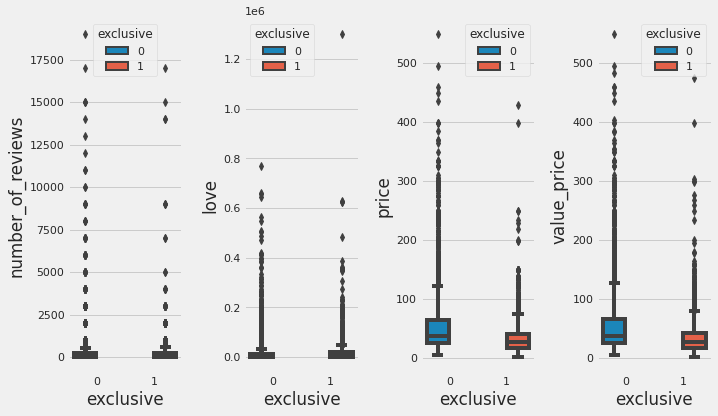

In [ ]:
# mencari nama-nama kolom yang numerik
numerik = df.select_dtypes(include='number').columns.drop(labels=['id', 'rating', 'exclusive'])
plt.figure(figsize=(20,6))
for i in range(0, len(numerik)):
  plt.subplot(1, 8, i+1)
  sns.boxplot(data=df, y=numerik[i], x='exclusive', orient='v', hue='exclusive')
  plt.tight_layout()

Berdasarkan boxplot diatas, hampir semua feature memiliki data outliers yang nilainya berbeda jauh dari data-data lain pada umumnya, maka perlu di handle agar data menjadi robust, dibawah ini dilakukan handling menggunakan IQR.

In [ ]:
# mencari quartile 1 dan 3
# cari jarak antar quartile
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3 - q1
# cari nilai minimal dari setiap kolom
minimal = q1 - 1.5 * iqr
# cari nilai maximal dari setiap kolom
maximal = q3 + 1.5 * iqr
# apakah outlier outlier = True
print(((df < minimal) | (df > maximal)).sum())

no_outliers = np.where(df['value_price'] > maximal['value_price'], maximal['value_price'], df['value_price'])

brand                   0
category                0
exclusive               0
id                    405
love                  891
number_of_reviews    1040
price                 641
rating                530
value_price           652
dtype: int64


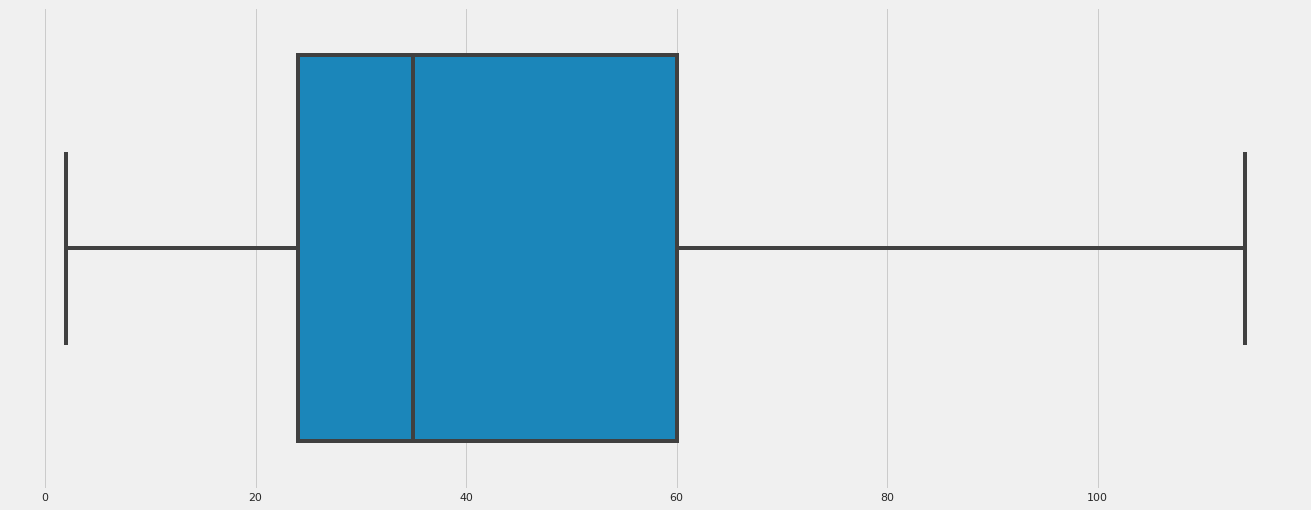

In [ ]:
sns.boxplot(no_outliers)

In [ ]:
# Handle Outlier data

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['number_of_reviews', 'value_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 7828
Jumlah baris setelah memfilter outlier: 6154


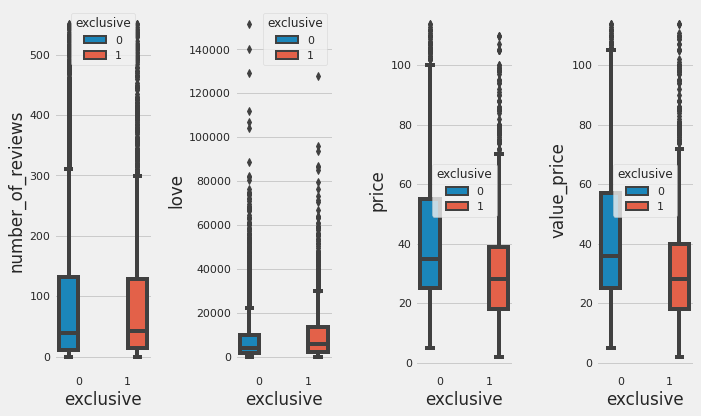

In [ ]:
# mencari nama-nama kolom yang numerik
numerik = df.select_dtypes(include='number').columns.drop(labels=['id', 'rating', 'exclusive'])
plt.figure(figsize=(20,6))
for i in range(0, len(numerik)):
  plt.subplot(1, 8, i+1)
  sns.boxplot(data=df, y=numerik[i], x='exclusive', orient='v', hue='exclusive')
  plt.tight_layout()

## Normalization/Standardization

In [ ]:
# normalize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# deklarasi
scaler = StandardScaler()
# fit lalu ubah langsung datanya
df['price_std'] = scaler.fit_transform(df['price'].values.reshape(len(df), 1))
df['value_price_std'] = scaler.fit_transform(df['value_price'].values.reshape(len(df), 1))

In [ ]:
# deklarasi normalizator
norm = MinMaxScaler()

# fit lalu ubah datanya
df['price_norm'] = norm.fit_transform(df['price'].values.reshape(len(df), 1))
df['value_price_norm'] = norm.fit_transform(df['value_price'].values.reshape(len(df), 1))

In [ ]:
df[['price_std', 'value_price_std', 'price_norm', 'value_price_norm']].describe()

,price_std,value_price_std,price_norm,value_price_norm
count,6.154000e+03,6.154000e+03,6154.000000,6154.000000
mean,-2.818675e-16,4.448108e-16,0.335269,0.341750
std,1.000081e+00,1.000081e+00,0.210171,0.214759
min,-1.595352e+00,-1.591450e+00,0.000000,0.000000
25%,-6.606631e-01,-6.767288e-01,0.196429,0.196429
50%,-2.782902e-01,-2.609465e-01,0.276786,0.285714
75%,4.439696e-01,5.290399e-01,0.428571,0.455357
max,3.163066e+00,3.065312e+00,1.000000,1.000000


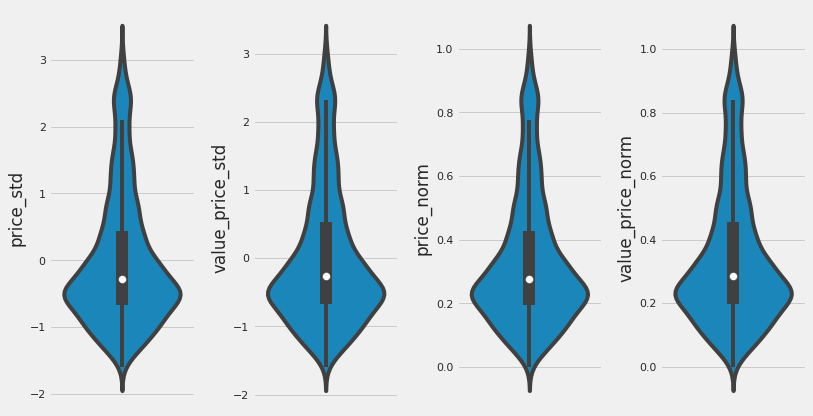

In [ ]:
new_numerik = ['price_std', 'value_price_std', 'price_norm', 'value_price_norm']
plt.figure(figsize=(20,6))
for i in range(0, len(new_numerik)):
  plt.subplot(1, 7, i+1)
  sns.violinplot(y=df[new_numerik[i]], orient='v')
  plt.tight_layout()

## Feature encoding

In [ ]:
df_copy = df
df_copy.select_dtypes(include='object')

,brand,category
0,SEPHORA COLLECTION,no category
1,SEPHORA COLLECTION,no category
2,SEPHORA COLLECTION,no category
3,SEPHORA COLLECTION,no category
4,SEPHORA COLLECTION,no category
...,...,...
7995,VOLUSPA,Candles
7996,TOM FORD,Lipstick
7997,FENTY BEAUTY by Rihanna,Lip Sets
7998,tarte,Mascara


In [ ]:
# melakukan feature one hot encoding
for cat in ['category']:
    onehots = pd.get_dummies(df_copy[cat], prefix=cat)
    df_copy = df_copy.join(onehots)

# melihat informasi setelah encoding
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6154 entries, 0 to 7999
Columns: 153 entries, id to category_no category
dtypes: float64(9), int64(2), object(2), uint8(140)
memory usage: 1.6+ MB


## Class imbalance

In [ ]:
df_copy['exclusive'].value_counts()

0    4476
1    1678
Name: exclusive, dtype: int64

In [ ]:
X = df_copy.drop(['exclusive','brand','category'],axis=1)
y = df_copy.exclusive
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X, y = smt.fit_resample(X, y)
print(X.shape)
print(y.shape)

(8952, 150)
(8952,)


In [ ]:
y_balanced = pd.Series(y)
y_balanced.value_counts()

1    4476
0    4476
dtype: int64

# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6154 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6154 non-null   int64  
 1   brand              6154 non-null   object 
 2   category           6154 non-null   object 
 3   rating             6154 non-null   float64
 4   number_of_reviews  6154 non-null   float64
 5   love               6154 non-null   float64
 6   price              6154 non-null   float64
 7   value_price        6154 non-null   float64
 8   exclusive          6154 non-null   int64  
 9   price_std          6154 non-null   float64
 10  value_price_std    6154 non-null   float64
 11  price_norm         6154 non-null   float64
 12  value_price_norm   6154 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 833.1+ KB


In [ ]:
df_new = df.drop(columns=['value_price','price','id','number_of_reviews','love']).copy()
num_dtypes =['int16','int32','int64','float16','float32','float64']
cats = df_new.select_dtypes(include='object').columns
numerical = df_new.select_dtypes(include=num_dtypes).columns
print(numerical)

Index(['rating', 'exclusive', 'price_std', 'value_price_std', 'price_norm',
       'value_price_norm'],
      dtype='object')


In [ ]:
df.sample(10)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,price_std,value_price_std,price_norm,value_price_norm
5828,2174084,NEST New York,Candles & Home Scents,3.5,2.0,382.0,48.0,48.0,0,0.358998,0.321149,0.410714,0.410714
894,1479922,NARS,Makeup,3.5,149.0,21900.0,24.0,24.0,0,-0.660663,-0.676729,0.196429,0.196429
2392,1832302,Fresh,Candles & Home Scents,3.5,3.0,673.0,60.0,60.0,0,0.868828,0.820088,0.517857,0.517857
910,1490101,Peter Thomas Roth,Shampoo,4.0,55.0,2900.0,18.0,18.0,0,-0.915578,-0.926198,0.142857,0.142857
321,1031988,MAKE UP FOR EVER,Makeup,4.0,49.0,4400.0,11.0,11.0,1,-1.212979,-1.217246,0.080357,0.080357
1559,1688829,MAKE UP FOR EVER,Bronzer,4.0,360.0,38000.0,36.0,36.0,1,-0.150833,-0.177790,0.303571,0.303571
3313,1953082,KVD Vegan Beauty,Face Brushes,4.5,26.0,9200.0,32.0,32.0,1,-0.320776,-0.344103,0.267857,0.267857
1335,1641158,The Art of Shaving,Shaving,5.0,1.0,264.0,100.0,100.0,0,2.568263,2.483217,0.875000,0.875000
3525,1977529,Antonym,Highlighter,3.5,19.0,3900.0,42.0,42.0,0,0.104083,0.071679,0.357143,0.357143
3642,1988989,Kiehl's Since 1851,Face Serums,4.0,82.0,12700.0,60.0,60.0,0,0.868828,0.820088,0.517857,0.517857


In [ ]:
df[numerical].describe()

,rating,exclusive,price_std,value_price_std,price_norm,value_price_norm
count,6154.000000,6154.000000,6.154000e+03,6.154000e+03,6154.000000,6154.000000
mean,4.050049,0.272668,-2.818675e-16,4.448108e-16,0.335269,0.341750
std,0.799915,0.445368,1.000081e+00,1.000081e+00,0.210171,0.214759
min,0.000000,0.000000,-1.595352e+00,-1.591450e+00,0.000000,0.000000
25%,4.000000,0.000000,-6.606631e-01,-6.767288e-01,0.196429,0.196429
50%,4.000000,0.000000,-2.782902e-01,-2.609465e-01,0.276786,0.285714
75%,4.500000,1.000000,4.439696e-01,5.290399e-01,0.428571,0.455357
max,5.000000,1.000000,3.163066e+00,3.065312e+00,1.000000,1.000000


In [ ]:
df[cats].describe()

,brand,category
count,6154,6154
unique,302,140
top,SEPHORA COLLECTION,Perfume
freq,432,339


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom brand:
SEPHORA COLLECTION     432
CLINIQUE               154
Kiehl's Since 1851     117
TOM FORD               102
tarte                   92
                      ... 
Eight & Bob              1
TokyoMilk                1
Cocofloss                1
Too Cool For School      1
invisibobble             1
Name: brand, Length: 302, dtype: int64

Value count kolom category:
Perfume                      339
Moisturizers                 278
Face Serums                  234
Rollerballs & Travel Size    202
Hair Styling Products        188
                            ... 
Lip Treatments                 1
Curls & Coils                  1
Spa Tools                      1
Cleansing Brushes              1
Powder Brush                   1
Name: category, Length: 140, dtype: int64



## Pendekatan Grafis

In [ ]:
df_new

,brand,category,rating,exclusive,price_std,value_price_std,price_norm,value_price_norm
0,SEPHORA COLLECTION,no category,5.0,0,0.443970,0.404305,0.428571,0.428571
1,SEPHORA COLLECTION,no category,0.0,0,0.443970,0.404305,0.428571,0.428571
2,SEPHORA COLLECTION,no category,0.0,0,0.443970,0.404305,0.428571,0.428571
3,SEPHORA COLLECTION,no category,0.0,0,0.443970,0.404305,0.428571,0.428571
4,SEPHORA COLLECTION,no category,0.0,0,0.443970,0.404305,0.428571,0.428571
...,...,...,...,...,...,...,...,...
7995,VOLUSPA,Candles,0.0,0,1.930975,1.859543,0.741071,0.741071
7996,TOM FORD,Lipstick,4.0,0,0.656399,0.612196,0.473214,0.473214
7997,FENTY BEAUTY by Rihanna,Lip Sets,4.5,1,-0.448234,-0.260947,0.241071,0.285714
7998,tarte,Mascara,4.5,0,-1.170494,-1.175668,0.089286,0.089286


### Univariate Analysis

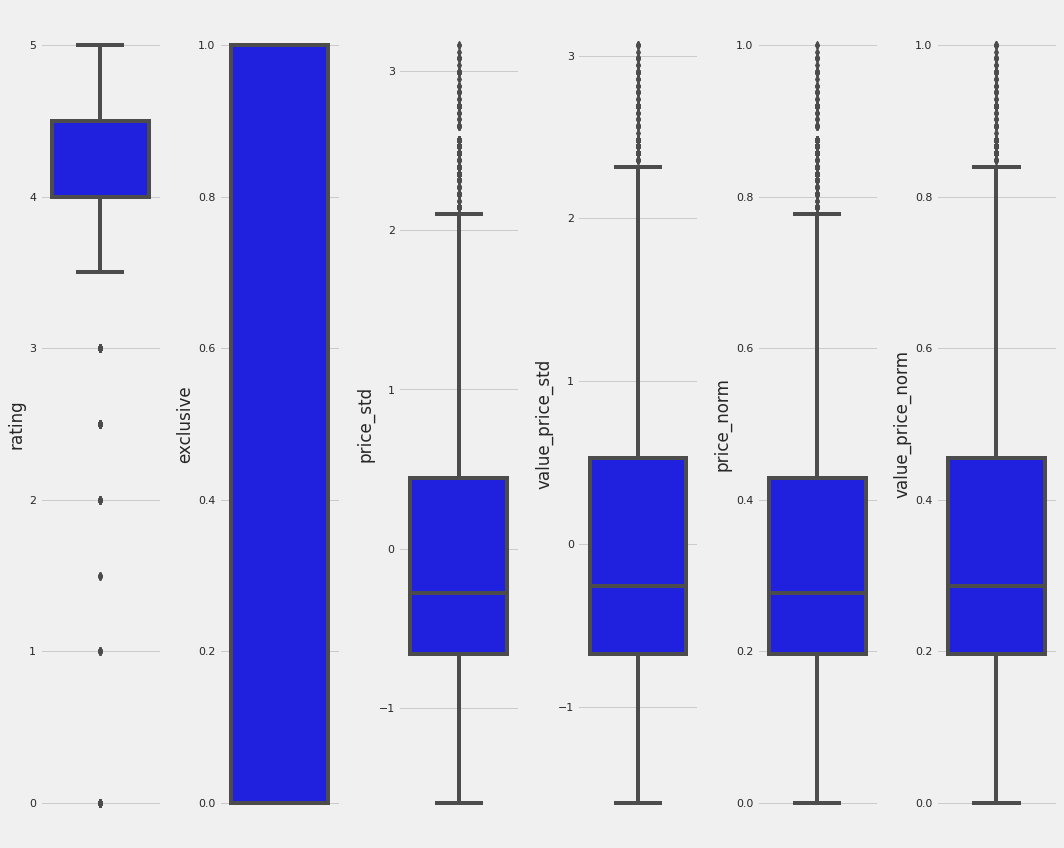

In [ ]:
plt.figure(figsize=(15, 12))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df_new[numerical[i]], color='blue', orient='v')
    plt.tight_layout()

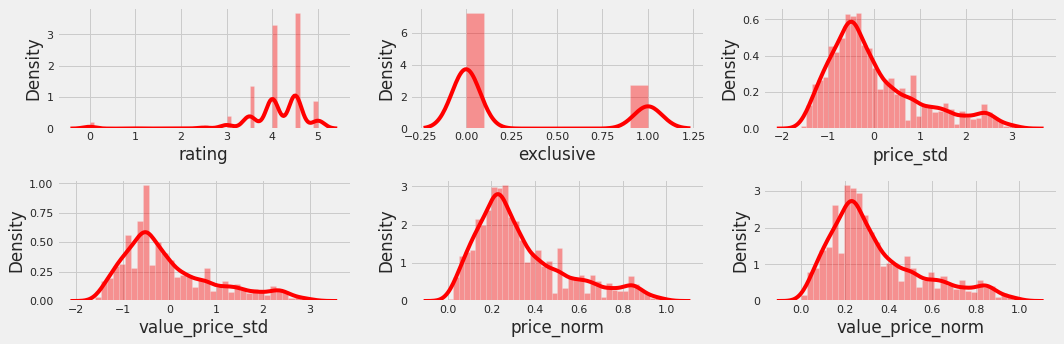

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(numerical)):
    plt.subplot(2, len(numerical)/2, i+1)
    sns.distplot(df_new[numerical[i]], color='red')
    plt.tight_layout()

### Multivariate Analysis

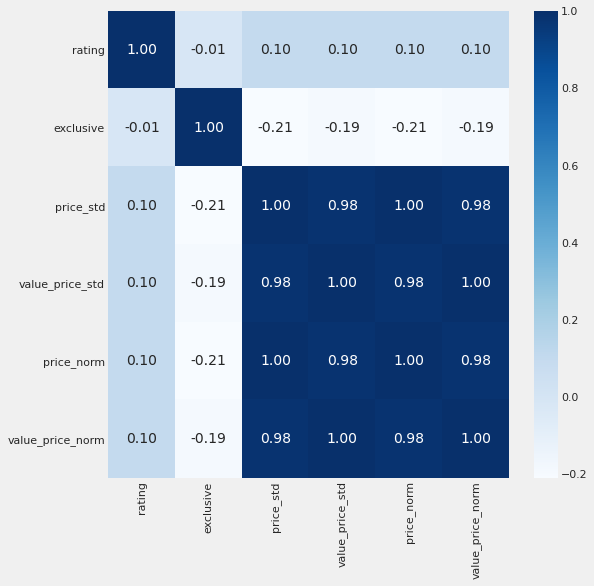

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1080x1080 with 0 Axes>

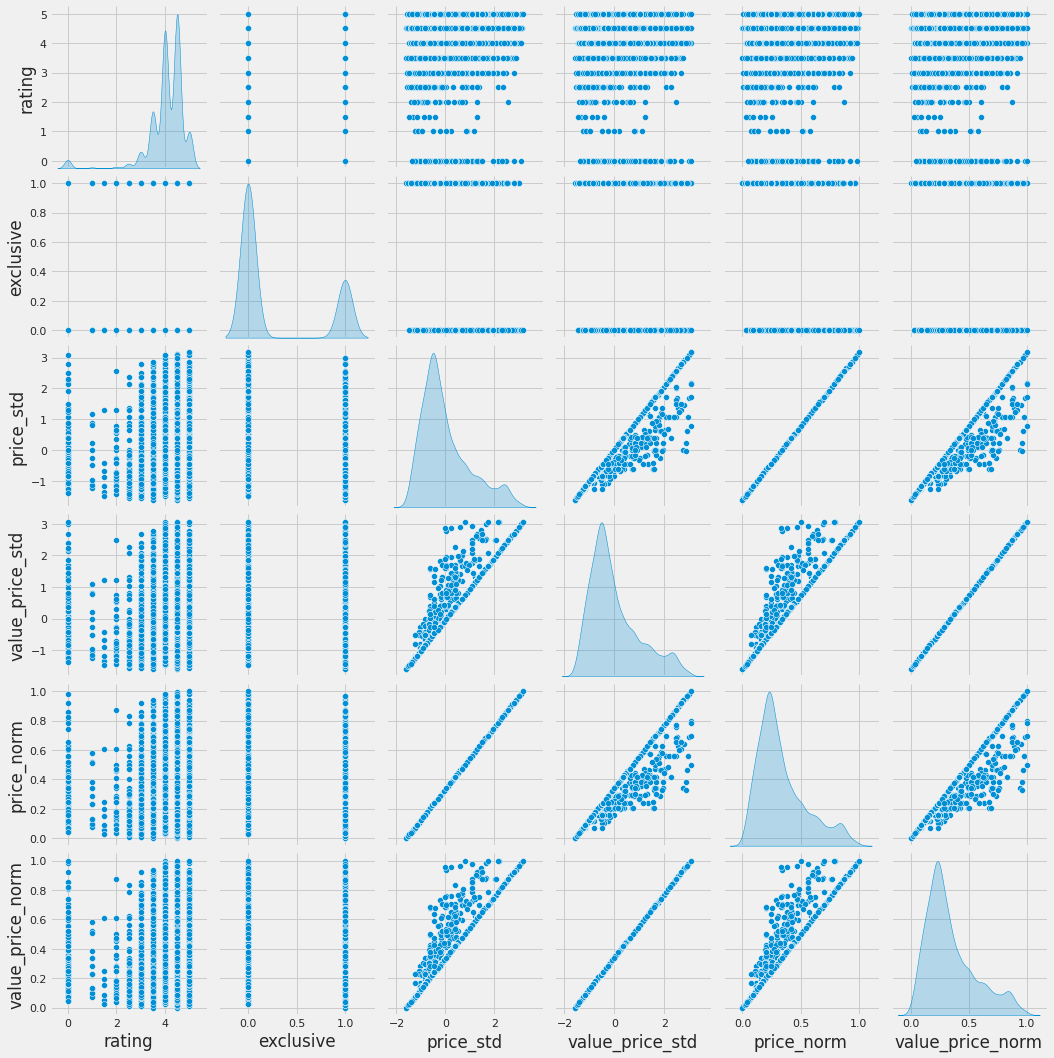

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_new, diag_kind='kde')

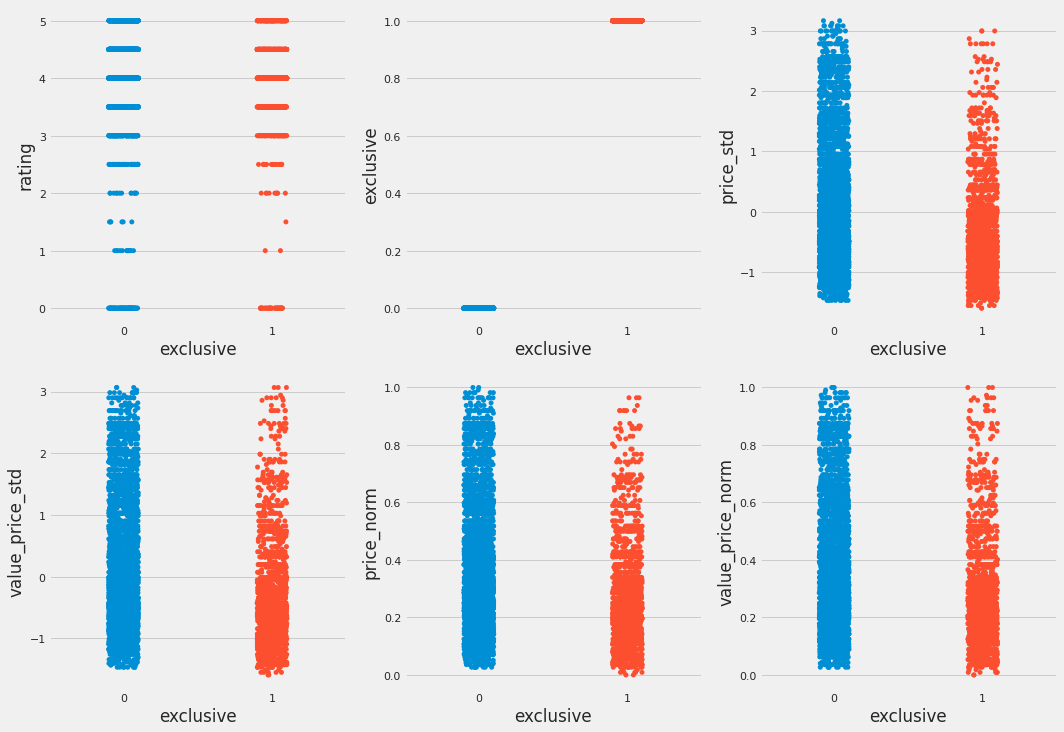

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='exclusive', y=numerical[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(numerical) + 1)

## Insight
Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

* masih ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang skew seperti love dan review
* beberapa fitur miliki korelasi yang linear seperti price dengan love dan review dengan love
* ada beberapa fitur yang tidak memiliki korelasi dengan target fitur(exclusive) seperti fitur review dan love dan bisa diabaikan pada saat modelling
* pengunaan SMOTE sangkat membantu dalam melakukan balacing data yang y target nya tidak sama

# Data Preparation

#### Import dataset

In [ ]:
df = pd.read_csv('/content/Product_Exclusive_Classification.csv')
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


#### Cari missing value dan handle missing value

In [ ]:
# cari berapa missing value(NaN) di setiap column
df.isnull().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [ ]:
# drop missing value NaN
df.dropna(inplace=True)

# cari berapa missing value(NaN) di setiap column
df.isnull().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

#### Cari data yang duplikat

In [ ]:
# apakah ada berapa data duplikat
df.duplicated().value_counts()

False    7828
dtype: int64

#### Cari outliers dan handle outliers tersebut

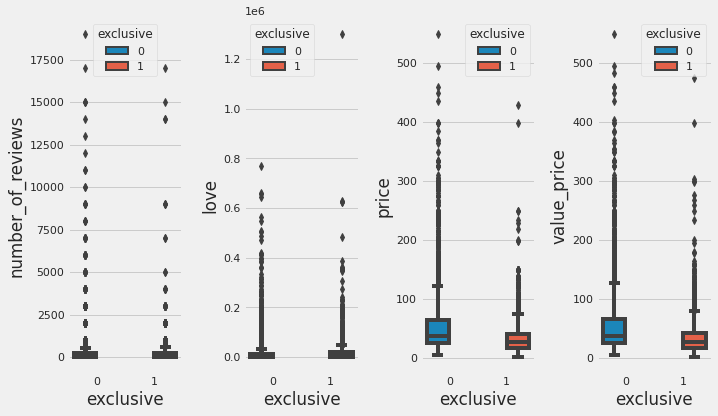

In [ ]:
# mencari nama-nama kolom yang numerik
numerik = df.select_dtypes(include='number').columns.drop(labels=['id', 'rating', 'exclusive'])
plt.figure(figsize=(20,6))
for i in range(0, len(numerik)):
  plt.subplot(1, 8, i+1)
  sns.boxplot(data=df, y=numerik[i], x='exclusive', orient='v', hue='exclusive')
  plt.tight_layout()

Kita cari tahu jumlah value-value yang dianggap outliers

In [ ]:
# mencari quartile 1 dan 3
# cari jarak antar quartile
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3 - q1
# cari nilai minimal dari setiap kolom
minimal = q1 - 1.5 * iqr
# cari nilai maximal dari setiap kolom
maximal = q3 + 1.5 * iqr
# apakah outlier outlier = True
print(((df < minimal) | (df > maximal)).sum())

brand                   0
category                0
exclusive               0
id                    405
love                  891
number_of_reviews    1040
price                 641
rating                530
value_price           652
dtype: int64


Terlihat pada kolom `number_of_reviews` terdapat banyak sekali outliers selain itu pada kolom `price` serta `value_price` juga terdapat banyak outliers. Hal ini perlu kita atasi supaya data kita membaik. Kita akan handle outliers pada kolom `number_of_reviews` dan `value_price`.

In [ ]:
# Handle Outlier data

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['number_of_reviews', 'value_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 7828
Jumlah baris setelah memfilter outlier: 6154


kita lihat distribusi nya menjadi seperti apa.

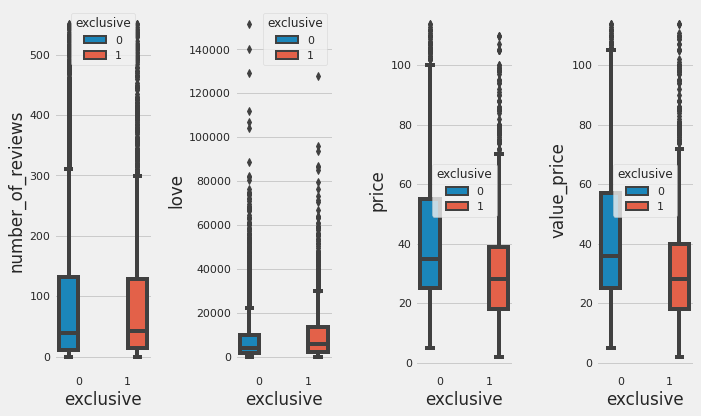

In [ ]:
# mencari nama-nama kolom yang numerik
numerik = df.select_dtypes(include='number').columns.drop(labels=['id', 'rating', 'exclusive'])
plt.figure(figsize=(20,6))
for i in range(0, len(numerik)):
  plt.subplot(1, 8, i+1)
  sns.boxplot(data=df, y=numerik[i], x='exclusive', orient='v', hue='exclusive')
  plt.tight_layout()

#### Melakukan standarisasi

In [ ]:
# deklarasi
scaler = StandardScaler()
# fit lalu ubah langsung datanya
df['price_std'] = scaler.fit_transform(df['price'].values.reshape(len(df), 1))
df['value_price_std'] = scaler.fit_transform(df['value_price'].values.reshape(len(df), 1))

Gambaran skala setelah dilakukan standarisasi

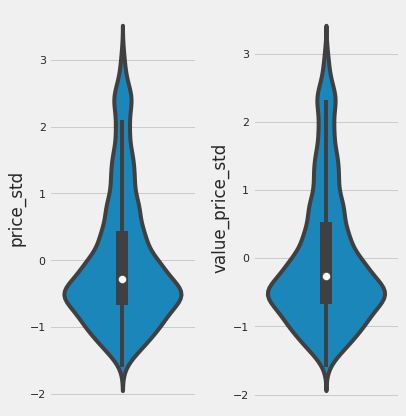

In [ ]:
new_numerik = ['price_std', 'value_price_std']
plt.figure(figsize=(20,6))
for i in range(0, len(new_numerik)):
  plt.subplot(1, 7, i+1)
  sns.violinplot(y=df[new_numerik[i]], orient='v')
  plt.tight_layout()

#### Melakukan One Hot Encoding pada feature category

kita akan mengubah feature yang valuenya dari huruf menjadi numerik, supaya komputer dapat mengerti data kita. Dikarenakan tidak terdapat tingkatan pada kolom `category` sehingga rasanya kurang tepat menggunakan label encoder, maka dari itu kita menggunakan One-hot encoding.

In [ ]:
# melakukan feature one hot encoding
for cat in ['category']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

# melihat informasi setelah encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6154 entries, 0 to 7999
Columns: 151 entries, id to category_no category
dtypes: float64(7), int64(2), object(2), uint8(140)
memory usage: 1.5+ MB


#### Cek apakah target sudah balance atau belum

In [50]:
df['exclusive'].value_counts()

0    4476
1    1678
Name: exclusive, dtype: int64

Ternyata belum, sebaiknya kita melakukan balancing pada target kita agar proporsi nya sama. Untuk melakukan balancing, kita akan menggunakan metode oversampling.

In [51]:
X = df.drop(['exclusive','brand','category'],axis=1)
y = df.exclusive
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_balanced, y_balanced = smt.fit_resample(X, y)
y_series = pd.Series(y_balanced)
y_series.value_counts()

1    4476
0    4476
dtype: int64

#### Data sudah siap

Data kita sudah siap untuk ditraining ke dalam model kita nanti, jika performa masih kurang, kita dapat melakukan preprocess data kembali. Ataupun kita dapat melakukan tuning hyperparameter dimodel kita.

In [52]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Conclusion 

3 pre-processing yang paling memberikan impact:
1. Membersihkan missing values dan data duplikat 
- Membersihkan missing values dan data duplikat menjadi langkah awal yang paling penting pada tahap pre-processing, jika pada pengolahan data terdapat banyak data yang kotor seperti data kosong, data hilang, data yang tidak sesuai dengan seharusnya, atau bahkan banyak data yang duplikat, maka hasil dari pengolahan data tersebut dapat menjadi sia-sia karena hasil yang tidak relevant, atau bahkan menghasilkan kesimpulan yang keliru, sehingga memberikan impact yang keliru pula atau bahkan tidak memberikan impact apa pun bagi perusahaan. 

2. Handling Outliers
- Data outliers membuat distribusi data menjadi tidak normal atau skew, selain itu akan membuat hasil analisis menjadi bias atau tidak sesuai dengan keadaaan yang sebenarnya, maka adanya data outliers atau data yang menyimpang dari data-data pada umumnya perlu dilakukan penanganan dengan IQR. 

3. Handling Class Imbalance 
- Class imbalance adalah kondisi dimana distribusi nilai kelas satu dengan yang lainnya sangat timpang. Adanya class imbalance dapat menurunkan akurasi terhadap sebuah model, Algoritma machine learning akan bekerja dengan baik jika jumlah sample atau populasi di setiap kelas tidak berbeda jauh sehingga dapat menghasilkan model yang akurat dan mengurangi error. Maka dari itu handling class imbalance dengan oversampling atau undersampling sangat diperlukan pada tahap pre-processing. 

